In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv
/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1676_virus_2892.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/NORMAL2-IM-0336-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1650_virus_2852.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person22_virus_55.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0101-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person122_bacteria_582.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coron

In [2]:
import pandas as pd
import numpy as np


#load the dataset into dataframes

meta_df=pd.read_csv('/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')



meta_df


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [3]:
print(meta_df.head())

   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  


In [4]:
meta_data=pd.DataFrame(meta_df)
meta_data

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
meta_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
meta_data['Dataset_type'].value_counts()

Dataset_type
TRAIN    5286
TEST      624
Name: count, dtype: int64

In [7]:
#drop the last two columns 

meta_data=meta_data.drop(columns=['Label_2_Virus_category', 'Label_1_Virus_category'])
meta_data

,Unnamed: 0,X_ray_image_name,Label,Dataset_type
0,0,IM-0128-0001.jpeg,Normal,TRAIN
1,1,IM-0127-0001.jpeg,Normal,TRAIN
2,2,IM-0125-0001.jpeg,Normal,TRAIN
3,3,IM-0122-0001.jpeg,Normal,TRAIN
4,4,IM-0119-0001.jpeg,Normal,TRAIN
...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST


In [8]:
meta_data.isnull().sum()

Unnamed: 0          0
X_ray_image_name    0
Label               0
Dataset_type        0
dtype: int64

In [9]:
unique_X_rays=meta_data['X_ray_image_name'].unique()
unique_X_rays

array(['IM-0128-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0125-0001.jpeg', ...,
       'person1634_virus_2830.jpeg', 'person1633_virus_2829.jpeg',
       'person1632_virus_2827.jpeg'], dtype=object)

In [10]:
prefix_counts = meta_data['X_ray_image_name'].count()
prefix_counts

5910

In [11]:
prefix_counts = meta_data['X_ray_image_name'].value_counts()
prefix_counts

X_ray_image_name
IM-0128-0001.jpeg                1
person510_bacteria_2150.jpeg     1
person508_virus_1021.jpeg        1
person509_bacteria_2145.jpeg     1
person509_bacteria_2146.jpeg     1
                                ..
person131_virus_265.jpeg         1
person1320_bacteria_3339.jpeg    1
person1320_bacteria_3340.jpeg    1
person1320_bacteria_3342.jpeg    1
person1632_virus_2827.jpeg       1
Name: count, Length: 5910, dtype: int64

In [12]:
meta_data['X_ray_image_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5910 entries, 0 to 5909
Series name: X_ray_image_name
Non-Null Count  Dtype 
--------------  ----- 
5910 non-null   object
dtypes: object(1)
memory usage: 46.3+ KB


In [13]:
print(len(meta_data))

5910


When **preparing and cleaning** a dataset of images, certain steps are commonly taken to ensure that the images are in a suitable format for training a machine learning model. Here’s what resizing and normalizing entail:

 **Resizing**:
 Resizing refers to changing the dimensions of the images to a uniform size. This is necessary because models generally expect all input images to be the same size. For example, you might resize all images to 224x224 pixels.

**Why It’s Done:** Resizing ensures that the input to the model is consistent. Different sizes can cause issues in model architecture and training, and resizing can also help in managing memory and computational resources.

**Question raises here** 

that, how we can check the pixels of the images. they may contain the same pixels. so, that is why we have to first check the pixels of any two images . 

remember this step is not crucial but to make sure whether the pixels are same or not....

**No of pixel(height, width, channels), of the ist image.**

In [15]:
import cv2

# Load the image
image = cv2.imread('/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0128-0001.jpeg')

# Check the shape of the image (height, width, channels)
print("Image shape:", image.shape)




Image shape: (1013, 1528, 3)


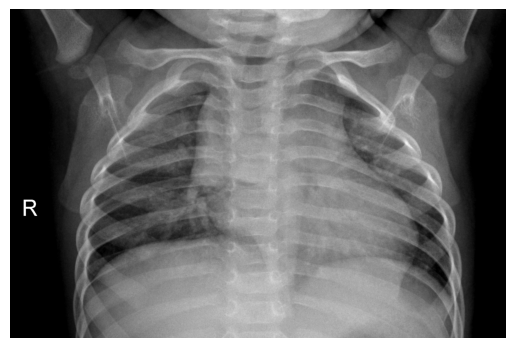

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 


plt.imshow(image)
plt.axis('off')
plt.show()

Image shape: (1434, 1810, 3)


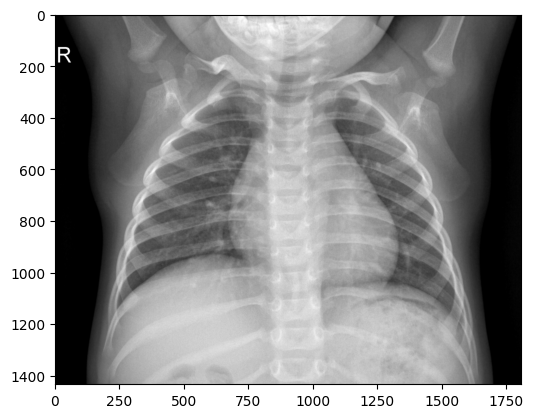

In [17]:
image_a=cv2.imread('/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0119-0001.jpeg')


print("Image shape:", image_a.shape)


plt.imshow(image_a)
plt.show()

see, we checked the pixels of two images , both are different. so we have to resize all the images, it means that we have to fix the same pixels for all the images, 

In [18]:
import os
import cv2
import pandas as pd
import numpy as np

In [19]:
image_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'
train_meta_data = meta_data[meta_data['Dataset_type'] == 'TRAIN']

resize_images = []
image_labels = []


def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale images
    
    if image is not None:
        # Resize the image
        resized_image = cv2.resize(image, (224, 224))
        # Normalize the image
        normalized_image = resized_image.astype('float32') / 255.0
        return normalized_image
    else:
        print(f"Failed to load image: {image_path}")
        return None

**cv2.imread(image_path, cv2.IMREAD_GRAYSCALE):** This function reads the image from the path given by image_path. The second argument, cv2.IMREAD_GRAYSCALE, tells OpenCV to convert the image to grayscale as it reads it.

meaning that the image will be read as a single-channel image (with intensity values only, no color).


**image is not None:** This checks if the image variable contains a valid image. If cv2.imread successfully loads an image, image will be a NumPy array containing the image data. If it fails (e.g., if the file path is incorrect or the image file is corrupted), cv2.imread returns None

In [20]:
for _, row in train_meta_data.iterrows():
    image_name = row['X_ray_image_name']
    label = row['Label']
    image_path = os.path.join(image_dir, image_name)
    
    # Process the image
    processed_image = preprocess_image(image_path)
    if processed_image is not None:
        # Append to the lists
        resize_images.append(processed_image)
        image_labels.append(label)

# Convert lists to NumPy arrays
resize_images = np.array(resize_images)
image_labels = np.array(image_labels)

# Output the results
print(f"Processed {len(resize_images)} training images.")

Processed 5286 training images.


**processed_image = preprocess_image(image_path)**: This line processes the image at image_path using the preprocess_image function, which resizes and normalizes the image.

**if processed_image is not None:**: This check ensures that the image was successfully processed. If the image couldn't be loaded or processed (meaning processed_image would be None), the following steps are skipped for that image.

**resize_images.append(processed_image):** If the image was processed successfully, it's added to the resize_images list. This list is being used to store all the processed images in the correct format, ready for use in model training or testing.

**image_labels.append(label)**: Similarly, the corresponding label for the image (whether it’s a COVID-19 case, normal, etc.) is added to the image_labels list. This keeps the images and their labels aligned, so you know which label corresponds to which image.

The iterrows() function returns both the index (_ is used to ignore it) and the row itself as a Series.

In [21]:
# Convert the lists to NumPy arrays if needed
resize_images = np.array(resize_images)
image_labels = np.array(image_labels)

In [22]:
resize_images

array([[[0.        , 0.        , 0.        , ..., 0.0627451 ,
         0.03529412, 0.02352941],
        [0.        , 0.        , 0.        , ..., 0.03529412,
         0.03137255, 0.02745098],
        [0.        , 0.        , 0.        , ..., 0.05098039,
         0.03529412, 0.02745098],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.4745098 , 0.49411765, 0.5058824 , ..., 0.2627451 ,
         0.24705882, 0.22352941],
        [0.31764707, 0.32941177, 0.34117648, ..., 0.25490198,
         0.22745098, 0.20784314],
        [0.18039216, 0.20392157, 0.21568628, ..., 0.2627451 ,
         0.22745098, 0.19215687],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

# After the nomalizing and resizing 

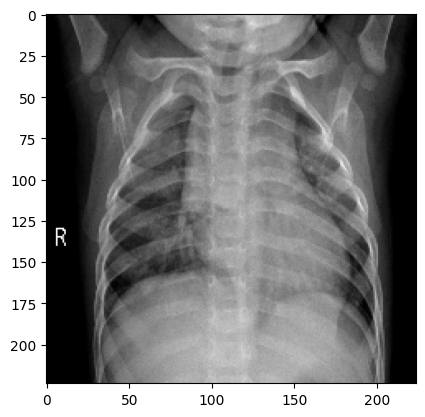

In [27]:
image_a = cv2.imread('/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0119-0001.jpeg')


image_a.shape
plt.imshow(resize_images[0], cmap='gray')
plt.show()

**for index, row in metadata_df.iterrows()**:: This loop iterates over each row of the DataFrame.


**index:** This is just a number that tells you which row you're currently looking at in the DataFrame. It starts from 0 and goes up as you move through each row.

**row**: This holds all the information in the current row of the DataFrame, like the image name and other details

In [91]:
#import os
#print(os.listdir(image_dir))

# Normalizing:

 Normalizing involves adjusting the pixel values of the images to a common scale, usually between 0 and 1 or -1 and 1. Pixel values in an image typically range from 0 to 255.
 
Normalizing helps to speed up the training process and can lead to faster convergence. It ensures that all pixel values are on a similar scale, which helps the model learn more effectively.

**normalized_image =** image.astype('float32') / 255.0 converts pixel values to the range [0, 1]. This is done by converting the image to float32 and dividing by 255.


**float32** has 7 significant decimal digits of precision. This means it can accurately represent numbers with up to 7 digits, including digits after the decimal point.


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(resize_images, image_labels, test_size=0.2, random_state=42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-08-16 19:43:45.518217: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 19:43:45.518372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 19:43:45.693867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


labels are strings like "Pnemonia" instead of numeric values. To resolve this, you need to map these string labels to integers. For example, you can map "Normal" to 0 and "Pnemonia" to 1.

In [31]:
# Mapping the labels to integers
label_mapping = {
    'Normal': 0,
    'Pnemonia': 1
}

# Apply the mapping to y_train and y_test
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

# Verify the conversion
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype: {y_test.dtype}")

y_train dtype: int64
y_test dtype: int64


In [32]:
print(f"X_train dtype: {X_train.dtype}")
print(f"X_test dtype: {X_test.dtype}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype: {y_test.dtype}")

X_train dtype: float32
X_test dtype: float32
y_train dtype: int64
y_test dtype: int64


In [33]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(224, 224, 1)),  # Use Input layer to define the shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/2
106/106 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8071 - loss: 0.6794 - val_accuracy: 0.9681 - val_loss: 0.0908
Epoch 2/2
106/106 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.9667 - loss: 0.0910 - val_accuracy: 0.9704 - val_loss: 0.0798
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step - accuracy: 0.9558 - loss: 0.1223
Test Accuracy: 0.9612476229667664


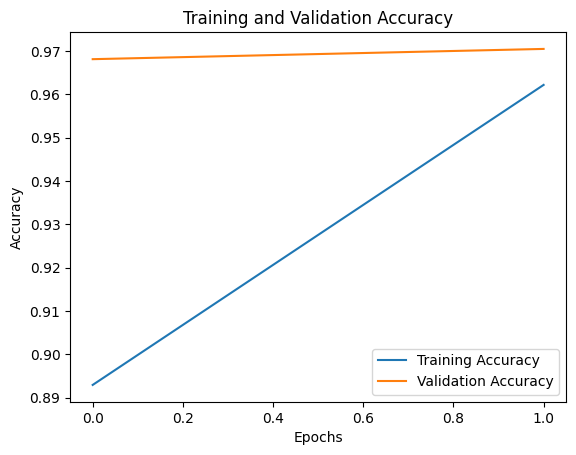

In [37]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




* **Training Accuracy:** Your model achieved a training accuracy of 96.67% by the end of the second epoch, which indicates that the model is learning the training data well.
* **Validation Accuracy:** The validation accuracy is 97.04%, which is very close to the training accuracy. This suggests that the model is generalizing well to unseen data (validation set) and is not overfitting.
* **Test Accuracy**: The test accuracy is 95.58%, which is slightly lower than the validation accuracy but still very good. This means the model is performing well on completely unseen data

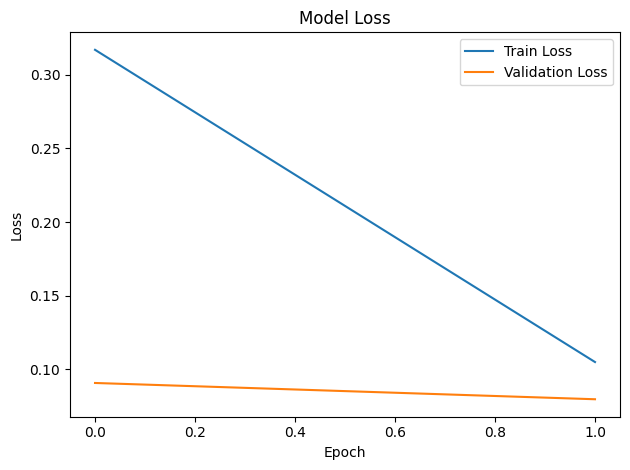

In [39]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


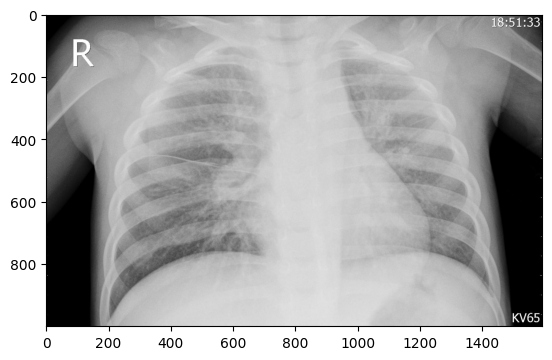

(1000, 1592, 3)

In [43]:
image_path=cv2.imread('/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1632_virus_2827.jpeg')
plt.imshow(image_path, cmap='gray')
plt.show()


image_path.shape

In [65]:
gray_image_path=cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)
resized_image_path=cv2.resize(gray_image_path, (224,224))

nomalized_image_path=resized_image_path.astype('float32') / 255.0
#add channel dimension
nomalized_image_path=np.expand_dims(nomalized_image_path, axis=-1)




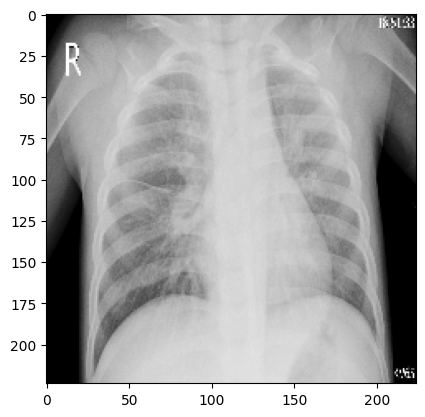

(224, 224, 1)

In [66]:
plt.imshow(nomalized_image_path, cmap='gray')
plt.show()

nomalized_image_path.shape

In [67]:
nomalized_image_path.shape

(224, 224, 1)

In [69]:
# Reshape the image to (1, 224, 224, 1)
input_image = np.expand_dims(nomalized_image_path, axis=0)  # Add batch dimension
input_image = np.expand_dims(input_image, axis=-1)  # Add channel dimension

# Predict using the model
prediction = model.predict(input_image)

# Check the prediction result
if prediction[0][0] > 0.5:
    print("The model predicts the image is Pneumonia (1).")
else:
    print("The model predicts the image is Normal (0).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
The model predicts the image is Pneumonia (1).


# 5909	5932	person1632_virus_2827.jpeg	Pnemonia	TEST


# 100% correct prediction

# --------------------------THE END------------------------